In [1]:
import pandas as pd
import random as rand

ALFA = 0.01
ERRO_D = 0.0001

def main_pt_1(data, length):
    teta0 = 0
    teta1 = 1 / 2
    decay_array = []
    
    while True:
        cost = 0
        dcost0 = 0
        dcost1 = 0
        
        for index, (x, y) in data.iterrows():
            cost += ALFA * 1 / (length * 2) * (((teta1 * x + teta0) - y) **2)

            dcost0 += ALFA * 1 / length * ((teta1 * x + teta0) - y)

            dcost1 += ALFA * 1 / length * (((teta1 * x + teta0) - y) * x)
    
        decay_array.append(cost)
        teta0 -= dcost0
        teta1 -= dcost1

        if abs(dcost0) <= ERRO_D and abs(dcost1) <= ERRO_D:
            break

    return teta0, teta1, decay_array

## Parte 1 - Regressão linear com uma variável

teta0: -3.8902532677896797 teta1: 1.1924783357556532


<AxesSubplot:xlabel='iter'>

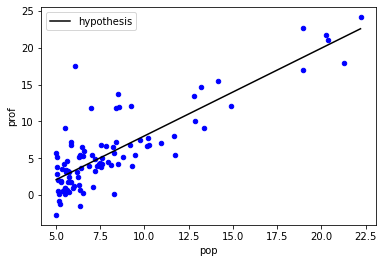

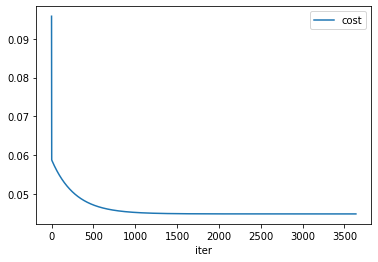

In [84]:

data1 = pd.read_csv("data1.txt", names=["pop", "prof"])
data1 = data1.sort_values(by="pop")

graph = data1.plot.scatter(x="pop", y="prof", color='blue')
length = len(data1["pop"])

teta0, teta1, decay_array = main_pt_1(data1, length)
print("teta0: {} teta1: {}".format(teta0, teta1))

hvalues = pd.DataFrame(
    { "pop": data1["pop"], 
      "hprof": [teta1 * x + teta0 for i, (x, y) in data1.iterrows()] })

hvalues.plot.line(x="pop", y="hprof", color="black", label="hypothesis", ax=graph)

pd.DataFrame(
    { "iter": [i for i in range(len(decay_array))],
      "cost": decay_array }).plot.line(x="iter", y="cost")

## Parte 2 - Regressão linear com múltiplas variáveis

In [15]:
import pandas as pd
import random as rand

# ALFA = 0.01
ERRO_D = 0.00001

def main_pt_2(data, length, ALFA):
    teta0 = 0
    teta1 = 1 / 2
    teta2 = 1 / 2
    decay_array = []
    
    while True:
        cost = 0
        dcost0 = 0
        dcost1 = 0
        dcost2 = 0
        
        for index, (x1, x2, y) in data.iterrows():
            cost += ALFA * 1 / (length * 2) * (((teta2 * x2 + teta1 * x1 + teta0) - y) **2)

            dcost0 += ALFA * 1 / length * ((teta2 * x2 + teta1 * x1 + teta0) - y)

            dcost1 += ALFA * 1 / length * (((teta2 * x2 + teta1 * x1 + teta0) - y) * x1)

            dcost2 += ALFA * 1 / length * (((teta2 * x2 + teta1 * x1 + teta0) - y) * x2)
    
        decay_array.append(cost)
        teta0 -= dcost0
        teta1 -= dcost1
        teta2 -= dcost2

        if abs(dcost0) <= ERRO_D and abs(dcost1) <= ERRO_D and abs(dcost2) <= ERRO_D:
            break

    return teta0, teta1, teta2, decay_array

ALFA1 0.1 => teta01: -1.0344474571637868e-16 teta11: 0.8845449174259017 teta21: -0.05295774923417817
ALFA2 0.01 => teta02: -1.1018859953083265e-16 teta12: 0.8824553071806664 teta22: -0.05086813798663315
ALFA3 0.001 => teta03: -1.1101982438207343e-16 teta13: 0.8615657400155372 teta23: -0.02997463388081977


<AxesSubplot:xlabel='iter'>

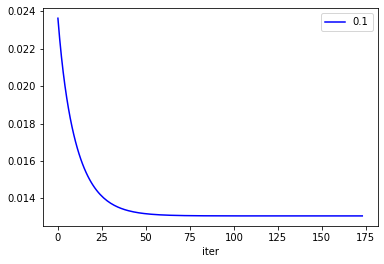

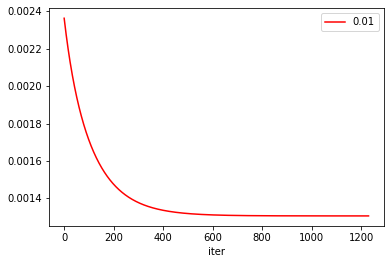

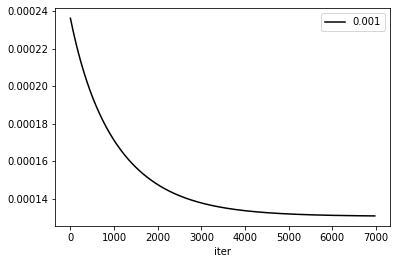

In [23]:

data2 = pd.read_csv("data2.txt", names=["size", "n_rooms", "price"])

mean_size = data2["size"].mean()
mean_n_rooms = data2["n_rooms"].mean()
mean_price = data2["price"].mean()

std_size = data2["size"].std()
std_n_rooms = data2["n_rooms"].std()
std_price = data2["price"].std()

data2["size"] = [(s - mean_size) / std_size for s in data2["size"]]
data2["n_rooms"] = [(s - mean_n_rooms) / std_n_rooms for s in data2["n_rooms"]]
data2["price"] = [(s - mean_price) / std_price for s in data2["price"]]

ALFA1 = 0.1
ALFA2 = 0.01
ALFA3 = 0.001

length = len(data2["size"])
teta01, teta11, teta21, decay_array1 = main_pt_2(data2, length, ALFA1)
print("ALFA1 {} => teta01: {} teta11: {} teta21: {}".format(ALFA1, teta01, teta11, teta21))

teta02, teta12, teta22, decay_array2 = main_pt_2(data2, length, ALFA2)
print("ALFA2 {} => teta02: {} teta12: {} teta22: {}".format(ALFA2, teta02, teta12, teta22))

teta03, teta13, teta23, decay_array3 = main_pt_2(data2, length, ALFA3)
print("ALFA3 {} => teta03: {} teta13: {} teta23: {}".format(ALFA3, teta03, teta13, teta23))

pd.DataFrame(
    { "iter": [i for i in range(len(decay_array1))],
      "cost": decay_array1 
      }).plot.line(x="iter", y="cost", label=str(ALFA1), color="blue")
pd.DataFrame(
    { "iter": [i for i in range(len(decay_array2))],
      "cost": decay_array2 
      }).plot.line(x="iter", y="cost", label=str(ALFA2), color="red")
pd.DataFrame(
    { "iter": [i for i in range(len(decay_array3))],
      "cost": decay_array3 
      }).plot.line(x="iter", y="cost", label=str(ALFA3), color="black")


#### 2.3 Veja que agora não é possível traçar o ajuste linearcomo no exercício anterior. Por quê?
O ajuste resultante se trata de uma reta, há dificuldade em traçar uma reta em um plano 3d para a correta visualização.

# Parte 3 - Equação Normal

In [26]:
import pandas as pd
import numpy as np

data2 = pd.read_csv("data2.txt", names=["size", "n_rooms", "price"])

mean_size = data2["size"].mean()
mean_n_rooms = data2["n_rooms"].mean()
mean_price = data2["price"].mean()

std_size = data2["size"].std()
std_n_rooms = data2["n_rooms"].std()
std_price = data2["price"].std()

data2["size"] = [(s - mean_size) / std_size for s in data2["size"]]
data2["n_rooms"] = [(s - mean_n_rooms) / std_n_rooms for s in data2["n_rooms"]]
data2["price"] = [(s - mean_price) / std_price for s in data2["price"]]

n_data = data2.copy()

# equação normal
n_data["x0"] = [1 for i in range(0, len(n_data["size"]))]

X = n_data[["x0", "size", "n_rooms"]].to_numpy()
Y = n_data[["price"]].to_numpy()
XT = np.transpose(X)

tetas = np.dot(np.dot(np.linalg.inv(np.dot(XT, X)), XT), Y)
teta0nm = tetas[0][0]
teta1nm = tetas[1][0]
teta2nm = tetas[2][0]

# gradiente descendente
ALFA = 0.001
length = len(data2["size"])
teta0gd, teta1dg, teta2gd, decay_array1 = main_pt_2(data2, length, ALFA1)

print("Teta da eq. normal => teta0nm: {}, teta1nm: {}, teta2nm: {}".format(teta0nm, teta1nm, teta2nm))
print("Teta do grad. desc. com ALFA1 {} => teta0gd: {} teta1dg: {} teta2gd: {}".format(ALFA, teta0gd, teta1dg, teta2gd))



Teta da eq. normal => teta0nm: -1.0061396160665481e-16, teta1nm: 0.8847659878549514, teta2nm: -0.05317881966327899
Teta do grad. desc. com ALFA1 0.001 => teta0gd: -1.0344474571637868e-16 teta1dg: 0.8845449174259017 teta2gd: -0.05295774923417817
